In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

<Figure size 432x288 with 0 Axes>

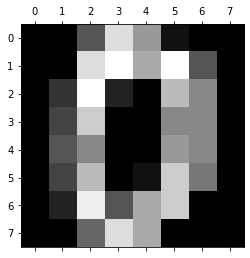

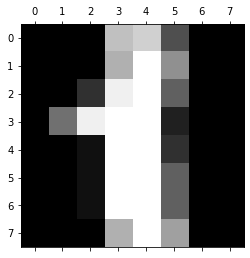

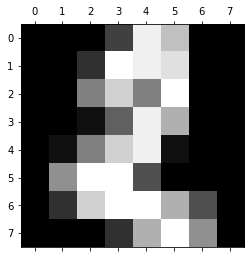

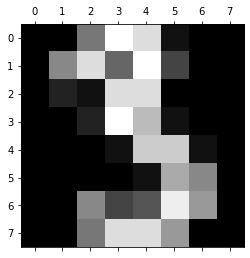

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [14]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [19]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [22]:
df["target"] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [25]:
from sklearn.model_selection import train_test_split
X = df.drop("target", axis=1)
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [31]:
Y_train

array([9, 6, 9, ..., 8, 7, 3])

In [52]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=70)
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=70)

In [53]:
model.score(X_test, Y_test)

0.975

In [54]:
Y_pred = model.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [58]:
accuracy_score(Y_test,Y_pred)

0.975

In [62]:
cm=confusion_matrix(Y_test, Y_pred)
cm

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 28,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 26,  0,  0],
       [ 0,  1,  1,  0,  1,  0,  0,  2, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 33]], dtype=int64)

Text(69.0, 0.5, 'Truth')

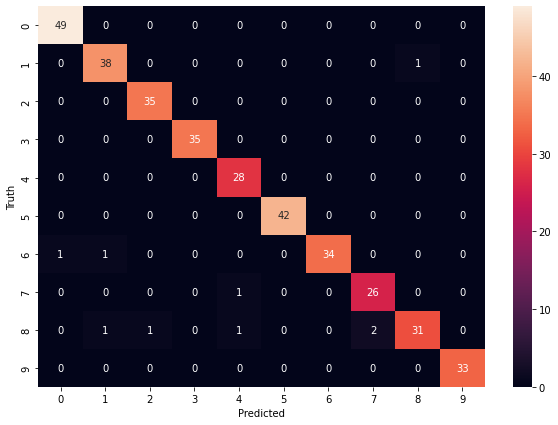

In [67]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")